Today we're going to utilize a very simple (but rich) data set housed in the UCI Machine Learning repository. The Adult Income Dataset is taken from US Census information and is formatted particularly well to study the features/regressors/predictors that go into determining whether an adult US resident is 'likely' to have a household income greater than $50,000. 

The data includes age, workclass, a weight variable (to account for the unbalanced sampling), education level, time spent in education (in years), marital status, occupation, relationship, race, sex, individuals residency, and a target column that indicates whether the person attained a household income greater than $50,000. All in all, an interested data set for socio-economic research. So let's get our hands dirty and load up some data!

In [159]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the data 

Load the adult data set, which is just .txt file. There are no column labels. Read the docs for the data set here: https://archive.ics.uci.edu/ml/datasets/Adult, and use the in-built Pandas dataframe options to attach the column labels into the data frame. 

## Data description
Listing of attributes: 

>50K, <=50K. 

age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [160]:
adult_dat = pd.read_csv("adult.txt", names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*', engine='python', na_values="?")

In [171]:
adult_dat = adult_dat[1:]
adult_dat.head()
original_cols=list(adult_dat)
original_cols

['Age',
 'Workclass',
 'fnlwgt',
 'Education',
 'Education-Num',
 'Martial Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country',
 'Target',
 'Workclass=Private',
 'Workclass=Local-gov',
 'Workclass=unknown',
 'Workclass=Self-emp-not-inc',
 'Workclass=Federal-gov',
 'Workclass=State-gov',
 'Workclass=Self-emp-inc',
 'Workclass=Without-pay',
 'Workclass=Never-worked',
 'Education=11th',
 'Education=HS-grad',
 'Education=Assoc-acdm',
 'Education=Some-college',
 'Education=unknown',
 'Education=10th',
 'Education=Prof-school',
 'Education=7th-8th',
 'Education=Bachelors',
 'Education=Masters',
 'Education=Doctorate',
 'Education=5th-6th',
 'Education=Assoc-voc',
 'Education=9th',
 'Education=12th',
 'Education=1st-4th',
 'Education=Preschool',
 'Martial Status=Never-married',
 'Martial Status=Married-civ-spouse',
 'Martial Status=unknown',
 'Martial Status=Widowed',
 'Martial Status=Separated',
 'Martial Status=Divorced',

# Convert the categorical variables into unordered integral values

For us to use the scikit-learn (although not every implementation of) Naive Bayes, we must pass in numerical data. Since we have decided to analyze all unordered categorical values, we can do a one-hot encoding to convert our categorical data into a numerical data frame.

**Note**: Do not use scikit-learn's implementation of One-hot encoding, we want to get you familiar with a bunch of methods, but as you should know by now, there are many ways to do the same thing. If you want, to a challenge, you can write the procedure both from scikit-learn and Pandas method. 

In [162]:
columns = ['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country' ]
#print(adult_dat.shape)

#replace NaN's with Unknown  in string columns, create new columns for each
#value in original columns, and make everything 0; i.e., column Sex spawns three
#new columns, Sex_Male, Sex_Female and Sex_Unknown becuse those Male, Female and
#Unknown are unique values in Sex
for col in columns:
    adult_dat[adult_dat[col].isnull()] = "unknown"
    for data in adult_dat[col].unique():
        adult_dat[col+"="+data]=0

        #set new column cells to 1 if the original row matches them:i,e,
#if Sex has in a row, then Sex_Male becomes a 1 in that row
for index, row in adult_dat.iterrows():
    for col in columns:
        adult_dat.set_value(index,col+"="+row[col],1)

#drop original columns        
# for col in columns:
#     adult_dat = adult_dat.drop(col, axis=1)
# adult_dat.head()

# Challenge Problem: Alternative Encoding Scheme to One-Hot Encoding

Likewise, beside doing a One-hot encoding, we could also map each string label in our categorical features to a integral value. As we previously leveraged a Pandas data frame method to do the encoding, we are now going to test out a scikit-learn method to impose the integral value encoding. Please check the docs and read up on: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. Proceed with the encoding and build a Naive Bayes and Logistic classifier for both. Do we get similar results? What should we expect? And why?

In [163]:
print(adult_dat.shape)
adult_dat = adult_dat[adult_dat.Target != 'unknown']
print(adult_dat.shape)
target = adult_dat['Target']
adult_dat = adult_dat[adult_dat.Age != 'unknown']
print(adult_dat.shape)
for index, row in adult_dat.iterrows():
    if row['Age'] == 'unknown':
        print(index)

(16281, 121)
(15060, 121)
(15060, 121)


# Summarize the data and engage in elementary data exploration

For some data exploration, use Pandas histogram methods to display the features. 

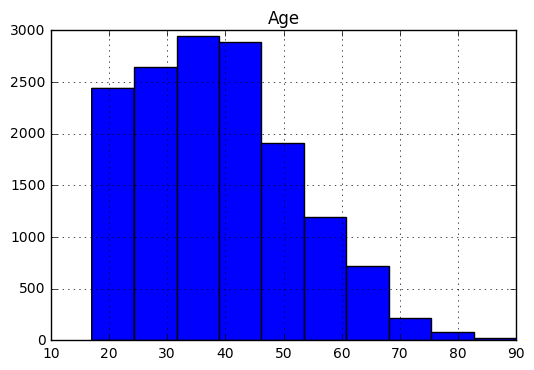

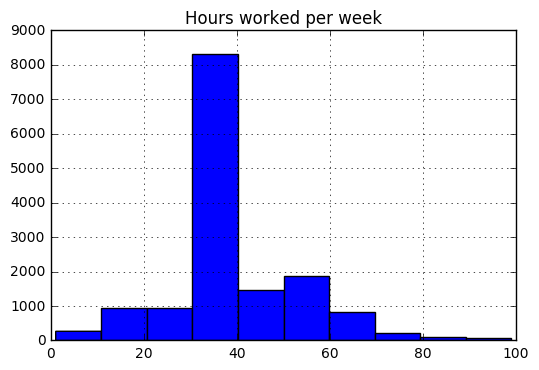

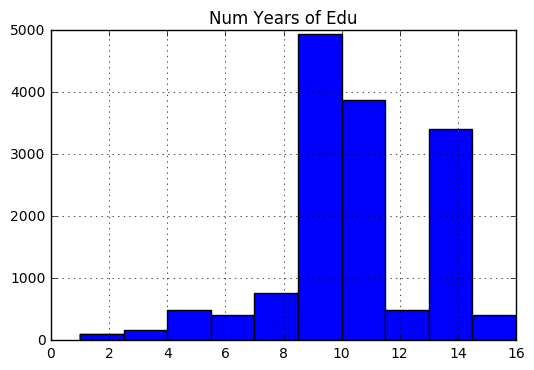

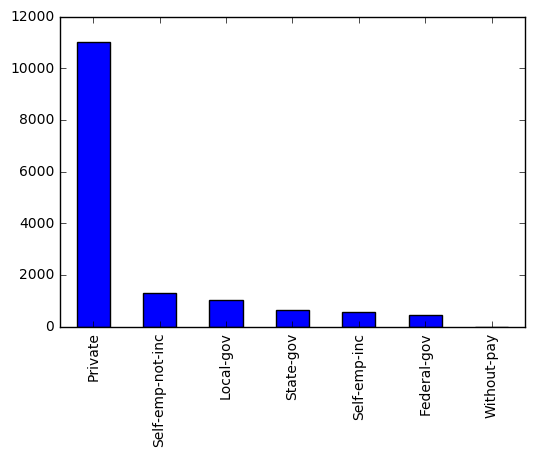

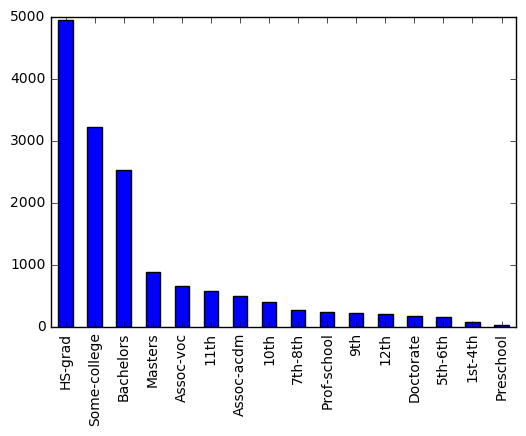

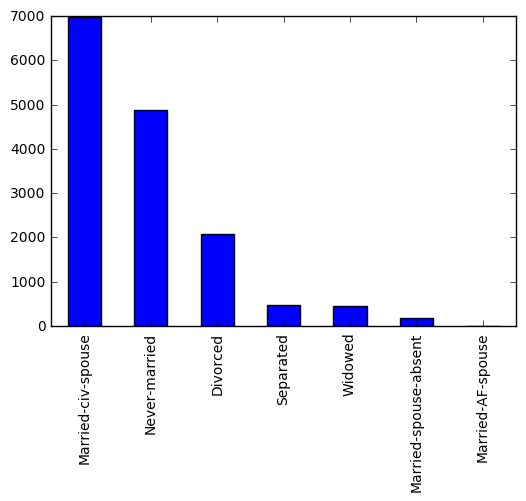

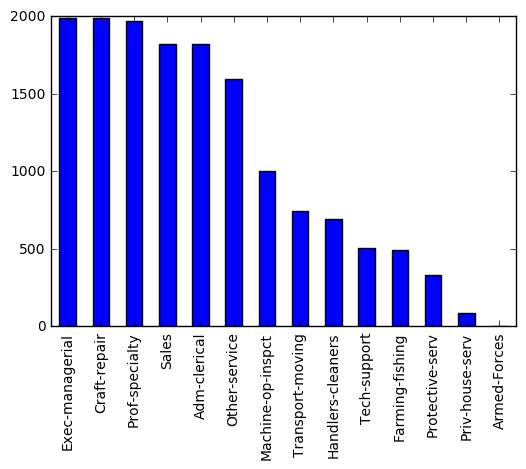

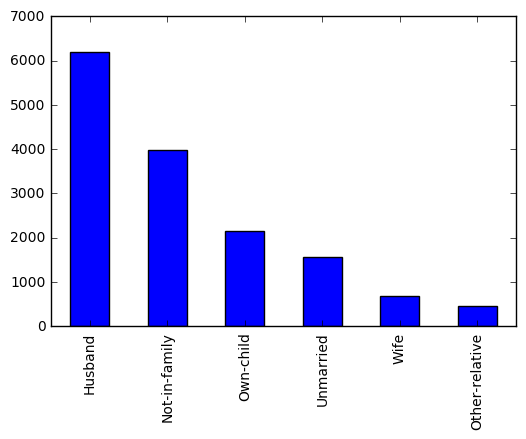

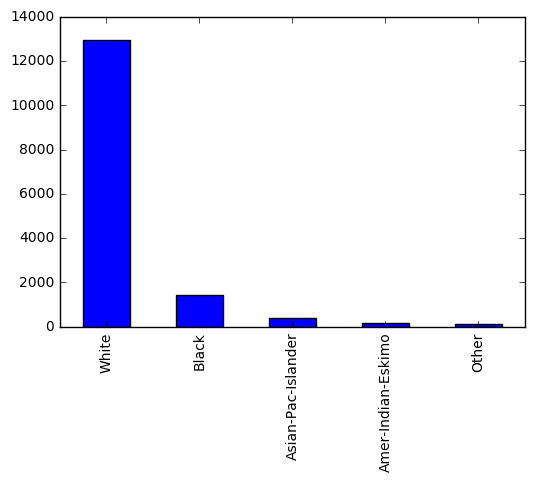

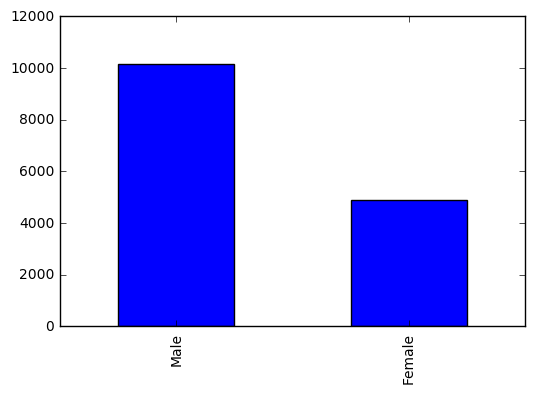

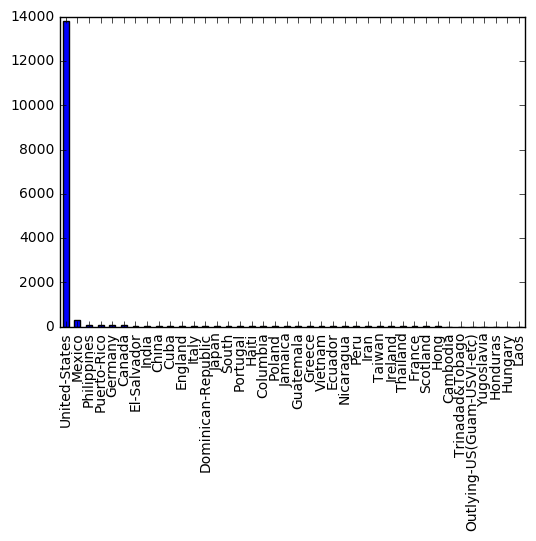

In [181]:
# Write histogram functions here, and/or any other data visualizations
adult_dat['Age'] = adult_dat['Age'].astype(np.int)
adult_dat["Age"].hist()
plt.title("Age")
plt.show()
adult_dat["Hours per week"].hist()
plt.title("Hours worked per week")
plt.show()
adult_dat["Education-Num"].hist()
plt.title("Num Years of Edu")
plt.show()
# for col in columns:
#     adult_dat[col].hist()
#     plt.show()
for col in columns:
    adult_dat[col].value_counts().plot(kind='bar')
    plt.show()

# Partition the data

Without using any direct method/libraries that would automatically accomplish this, please partition the data set 70/30. You can use anything from the math, pandas, or numpy library, do not use other libraries. 

In [186]:
boolean_mask = np.random.rand(len(adult_dat)) < 0.7
boolean_mask
X = adult_dat[boolean_mask]
print(X.shape)
y = adult_dat[~boolean_mask]
print(y.shape)

(10550, 121)
(4507, 121)


# Define your feature set and define your target 

# Run Naive Bayes Classifier

Instantiate the Naive Bayes predictor from scikit-learn with the training data. 

# Check Accuracy / Score for Naive Bayes

Define the target and feature set for the test data

Score the Naive Bayes classifier on the test data

# Check Accuracy / Score for a Logistic Classifier 

Define a logistic regression and train it with the feature and target set

Produce the accuracy score of the logistic regression from the test set

Was that what you expected? All we did was remove non categorical variables, and imposed a One-hot encoding, should we have expected the Naive Bayes to underperform the Logistic? Here are some other things you can think about:

1. What other metrics outside of simple accuracy can we utilize to measure performance?
2. Could some pair-wise correlation between pair-wise features in our feature set have caused an issue with the Naive Bayes? What are the assumptions for Naive Bayes which may cause this to happen? 
3. How could we improve the performance of Naive Bayes? 
4. What about the numerica features we left out, should we bring them back in? How?

If you want to expand on your analysis, why not build a correlation matrix, or perhaps print a summary of the logistic regression, would an ANOVA table help in our assessment for this case? 